In [27]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# sklearn imports
from sklearn.model_selection import train_test_split

import wrangle as w
import explore as e
import model as m

# Project Description
The healthcare breach dataset is utilized in this project to find drivers for breach type. 


# Project Goal

* Discover drivers of breach type in the healthcare breach dataset 
* Use drivers to develop a machine learning model to classify healthcare facilities with the probablity of a breach type.
* Breach types are security incidents in which unauthorized parties gain access to sensitive data or confidential information.
* This information could be used to further our understanding of which elements contribute to a breach types.

# Initial Thoughts

My initial hypothesis is that drivers of breaches will be elements such as state, entity_type, season, location, mulit-breach location

# Acquire
* Aquire dataset from [U.S. Department of Health and Human Services
Office for Civil Rights](https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf) 
* It contained 867 rows and 9 columns before cleaning
* Each row represents a healthcare facility 
* Each column represents a feature of those facilities

# Prepare
- Prepare Actions:
    * Renamed columns to promote readability
    * Checked for nulls in the data (there were nulls within state column, which were found to be from Puerto Rico)
    * Checked that column data types were appropriate
    * Added multi_breach_location column, and season column
    * Removed features:
        - Name of Covered Entity 
        - Web Description
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20), stratifying on 'breach_type'
    * Outliers have not been removed for this iteration of the project


In [50]:
# clean df
df = w.clean_df()

In [51]:
# split data
train, validate, test = w.split_data(df)

# Summarize df 

In [52]:
# sample of df
train.head()

,state,entity_type,number_affected,date,location,business_associate_present,multi_breached_location,season,breach_type,season_Autumn,spring,summer,winter,business_associate_present_No,business_associate,hacking_or_it_incident,improper_disposal,loss,theft,unauthorized_access_or_disclosure
850,MS,Healthcare Provider,62342,2021-07-02,Network Server,No,0,Summer,Hacking/IT Incident,0,0,1,0,1,0,1,0,0,0,0
129,MA,Healthcare Provider,757,2023-03-15,Email,No,0,Spring,Hacking/IT Incident,0,1,0,0,1,0,1,0,0,0,0
664,MA,Healthcare Provider,1541,2022-03-14,Network Server,No,0,Spring,Hacking/IT Incident,0,1,0,0,1,0,1,0,0,0,0
218,IN,Business Associate,1237,2023-01-13,Network Server,Yes,0,Winter,Unauthorized Access/Disclosure,0,0,0,1,0,1,0,0,0,0,1
638,ND,Healthcare Provider,510574,2022-04-11,Network Server,No,0,Spring,Hacking/IT Incident,0,1,0,0,1,0,1,0,0,0,0


# Explore

# Are States Related to the Type of Breach?
$H_0$: States are independent of Breach Type

$H_a$: States are dependent of Breach Type

**I will use an Chi-Square, to investigate whether states are related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

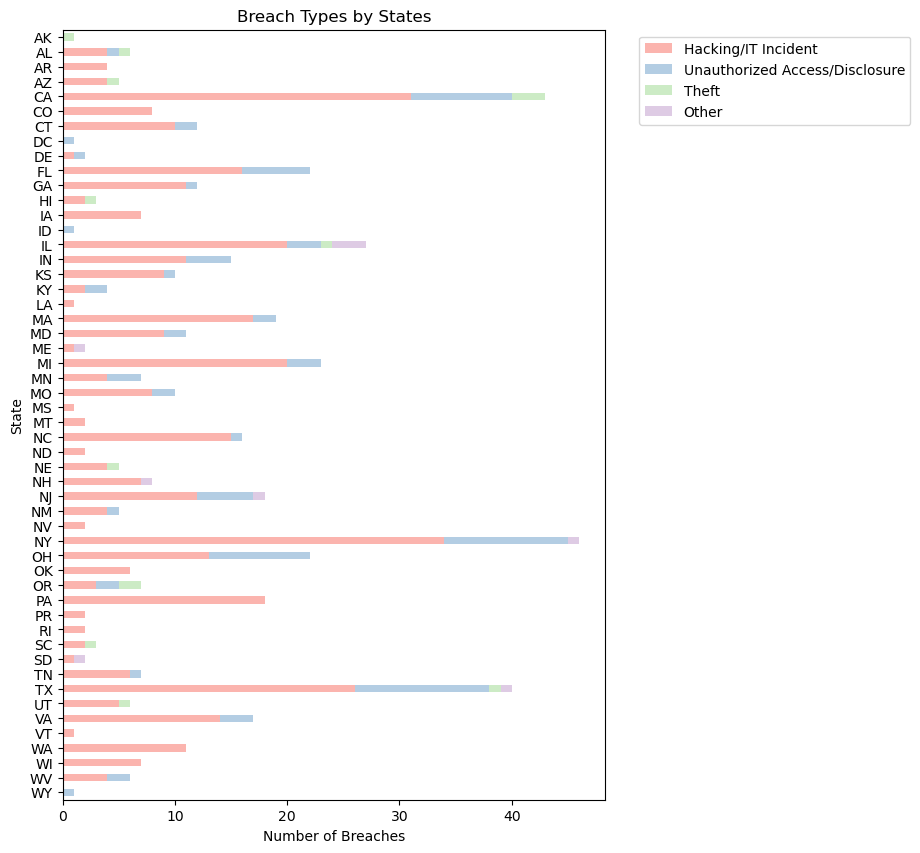

In [53]:
# Visualization of breaches and the number of occurences in different states
loc_df = train.copy()
e.plot_stacked_bar(
    loc_df,
    "state",
    "breach_type",
    "Breach Types by States",
    "Number of Breaches",
    "State",
     limit=3,
    figsize=(7,10)
)

In [60]:
# chi-square statisical test for breach and state
e.cross_function(train, "breach_type", "state")

Reject the null hypothesis: Sufficient
 chi^2 = 358.21239323300324 p = 1.4410540359924828e-10


**We rejected the null hypothesis, therefore, we have evidence to support that state is dependent of the breach type. Based on this, I believe that using the 'state' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Is Location Dependent to the Breach Type?
$H_0$: Location independent of Breach Type


$H_a$: Location dependent of Breach Type

**I will use an Chi-Square, to investigate whether location are related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

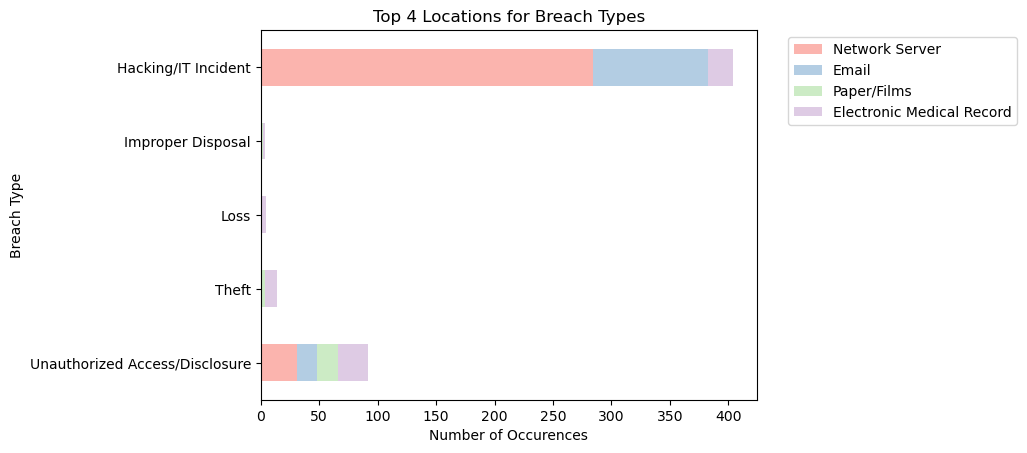

In [62]:
# Visualization of breaches and the number of occurences in the top 5 locations
e.plot_stacked_bar(
    train,
    "breach_type",
    "location",
    "Top 4 Locations for Breach Types",
    "Number of Occurences", 
    "Breach Type",
    limit = 4,
    legendnames=("Network Server", "Email", "Paper/Films", "Electronic Medical Record", "Other")
)

**We rejected the null hypothesis, therefore, we have evidence to support that location is dependent of the breach type. Based on this, I believe that using the 'location' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Are Multiple Locations Related to the Breach type?
$H_0$: Multiple breach location independent of Breach Type


$H_a$: Multiple breach location dependent of Breach Type

**I will use an Chi-Square, to investigate whether multiple locations are related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

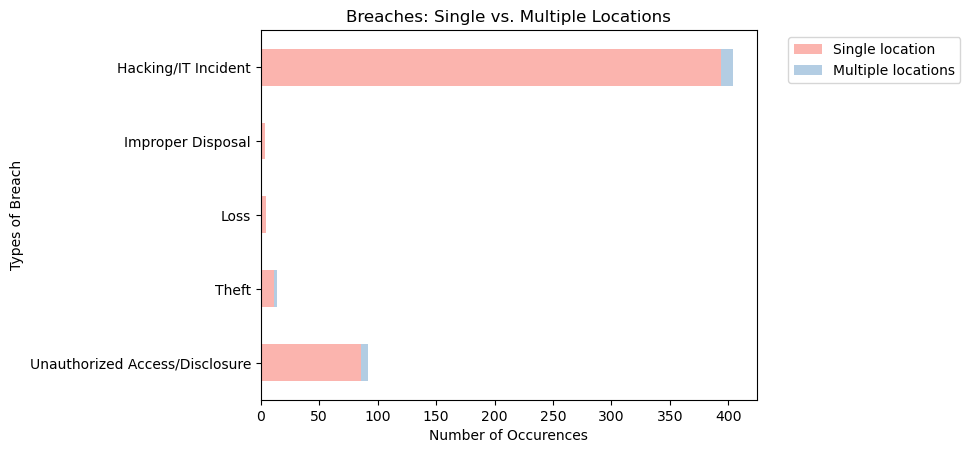

In [34]:
# Visualization of breaches and the number of occurences in multiple or single locations
e.plot_stacked_bar(
    train,
    "breach_type",
    "multi_breached_location",
    "Breaches: Single vs. Multiple Locations",
    "Number of Occurences", 
    "Types of Breach",
    legendnames=("Single location","Multiple locations")
)

In [61]:
# chi-square statisical test for breach and location
e.cross_function(train, "location", "breach_type")

Reject the null hypothesis: Sufficient
 chi^2 = 389.2470821669384 p = 3.4635025290808315e-70


**We rejected the null hypothesis, therefore, we have evidence to support that multiple locations is dependent of the breach type. Based on this, I believe that using the 'multi_breach_location' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Is the Summer Season Related to the Breach type?
$H_0$: Summer is independent of Breach Type

$H_a$: Summer is dependent of Breach Type

**I will use an Chi-Square, to investigate whether summer is related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

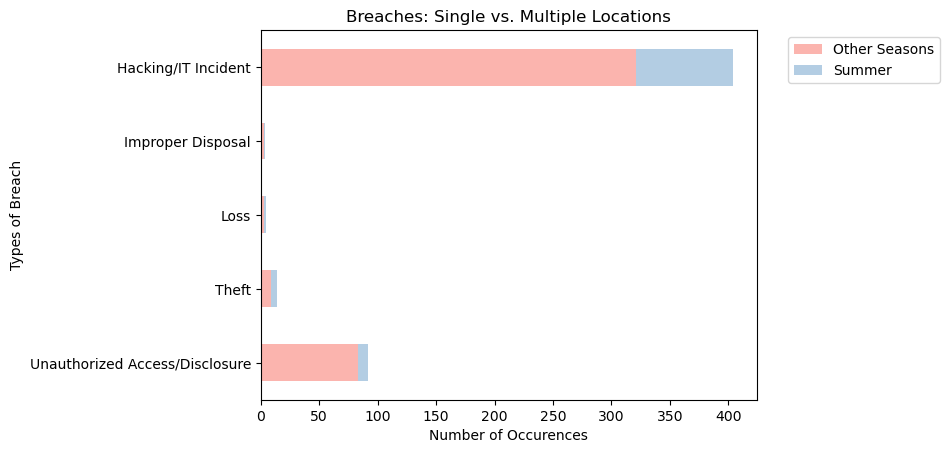

In [56]:
# Visualization of breaches and the number of occurences in Summer
e.plot_stacked_bar(
    train,
    "breach_type",
    "summer",
    "Breaches: Single vs. Multiple Locations",
    "Number of Occurences", 
    "Types of Breach",
    legendnames=("Other Seasons","Summer")
)

In [57]:
# chi-square statisical test for breach and summer
e.cross_function(train, "summer", "breach_type")

Reject the null hypothesis: Sufficient
 chi^2 = 9.644965806953664 p = 0.04685225603676333


**We rejected the null hypothesis, therefore, we have evidence to support that the Summer is dependent of the breach type. Based on this, I believe that using the 'summer' feature in modeling will likely have a small positive impact on the model's accuracy.**

# Is Season Related to the Breach Type?
$H_0$: Season is independent of Breach Type


$H_a$: Season is dependent of Breach Type

**I will use an Chi-Square, to investigate whether states are related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

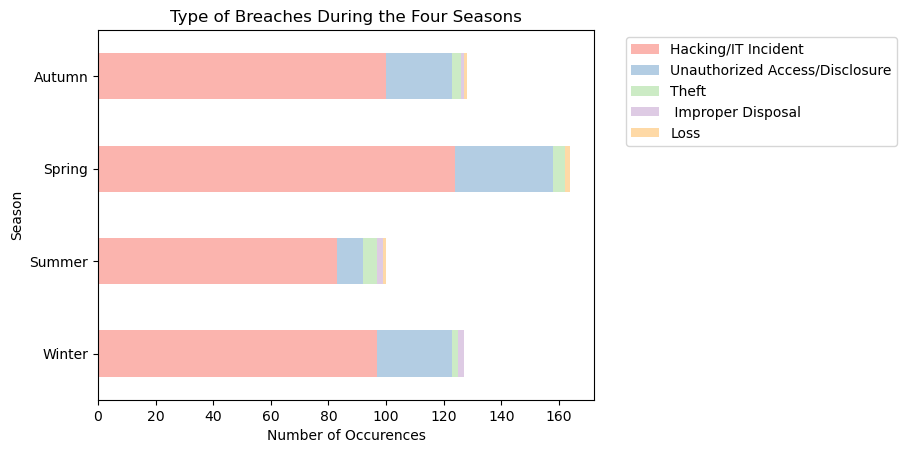

In [58]:
# Visualization of breaches and the number of occurences in each season
e.plot_stacked_bar(
    train,
    "season",
    "breach_type",
    "Type of Breaches During the Four Seasons",
    "Number of Occurences", 
    "Season",
    legendnames=("Hacking/IT Incident","Unauthorized Access/Disclosure", "Theft", " Improper Disposal", "Loss")
)

In [59]:
# chi-square statisical test for breach and season
e.cross_function(train, "season", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 13.525811971642984 p = 0.33200735914606166


**Failed to reject the null hypothesis will not move forward into modeling.**

# Is a Business Associate Present Related  to the Breach type?
$H_0$: Are Business Associate Present independent of Breach Type

$H_a$: Are Business Associate Present dependent of Breach Type

**I will use an Chi-Square, to investigate whether states are related to breaches.**

I will use a confidence interval of 95%

The alpha is .05

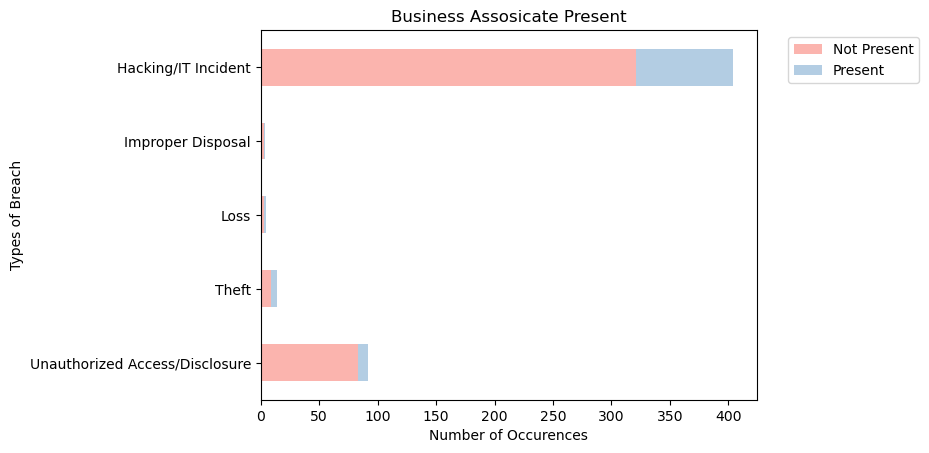

In [40]:
# Visualization of breaches and the number of occurences in each season
e.plot_stacked_bar(
    train,
    "breach_type",
    "summer",
    "Business Assosicate Present",
    "Number of Occurences", 
    "Types of Breach",
    legendnames=("Not Present","Present")
)

In [41]:
# chi-square statisical test for breach and business associate
e.cross_function(train, "business_associate", "breach_type")

 Fail to reject the null: Insufficient evidence
 chi^2 = 8.573100969101905 p = 0.07270213455773493


**Failed to reject null hypothesis, due to lack of evidence it is not likely that "business_associate" will be a useful feature to model on.**

# Exploration Summary
* "Location" was found to be a driver of "breach_type", Hacking/IT incidents and Unauthorized Access/Disclousre breachs appeared like they occured more in Network Servers.
* "State" was found to be a driver of "breach_type", some states only had Hacking/IT incidents breaches, possible as a result of not enough samples from the states.
* "Multiple Locations" was found to be a driver of "breach_type",  breaches with 'Multiple Locations' appeared more in theft breaches.
* "Summer" was found to be a driver of "breach_type", Loss and Theft appeared more in the 'Summer' than other seasons.
* "Season" was not found to be a driver of "breach_type"
* "Business Associate" was not found to be a driver of "breach_type"

## Features Not Continuing to Modeling

* Season and Business Associate

# Modeling

* My evaluation metric will use accuracy.
    - Positive Class, actual and predicted: Hacking/IT Incident, predicted Hacking/IT Incident, Improper Disposal, Loss, and Theft class
    - Negative Class, actual value belongs to different class
    
* Hacking/IT Incident is approximately 77% of the data, will be used as the baseline accuracy.

In [42]:
# baseline accuracy
baseline_accuracy = (train.breach_type == "Hacking/IT Incident").mean()
round(baseline_accuracy, 2)

0.78

In [43]:
# prep data for modeling
df = m.model_df()
train, validate, test = w.split_data(df)
x_train, y_train, x_validate, y_validate, x_test, y_test = m.create_x_y(train, validate, test, target= "breach_type")

# Decision Tree Model  

In [44]:
# reviewing the 1-4 max_depth
m.depth_check(x_train, y_train, x_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.813102,0.850575,-0.037473
1,2,0.834297,0.844828,-0.010531
2,3,0.845857,0.844828,0.001029
3,4,0.851638,0.856322,-0.004684


In [20]:
# selected max_depth = 3
m.best_tree(x_train, y_train, x_validate, y_validate)


    Accuracy of Decision Tree classifier on training set: 0.85
    Accuracy of Decision Tree classifier on validation set: 0.84
    


# RandomForest Model

In [21]:
# reviewing the max_depth and min_samples_leaf
m.leaf_check(x_train, y_train, x_validate, y_validate).head()

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.8786,0.8736,0.005
1,2,9,0.8420,0.8621,-0.020
2,3,8,0.8304,0.8678,-0.037
3,4,7,0.8247,0.8678,-0.043
4,5,6,0.8189,0.8563,-0.037


In [22]:
# randomforest model results (min_samples_leaf 1 , max_depth 10)
m.best_forest(x_train, y_train, x_validate, y_validate)


    Accuracy of Random Forest on training set: 0.88
    Accuracy of Random Forest on validation set: 0.87
    


# KNN Model

In [23]:
# KNN model results
m.best_knn(x_train, y_train, x_validate, y_validate)


    Accuracy of KNN on training set: 0.81
    Accuracy of KNN on validation set: 0.83
    


# Logistic Regression 

In [24]:
# logistic regression model results
m.logit_accuracy(x_train, y_train, x_validate, y_validate)



    Accuracy of Logistic Regression on training set: 0.86
    Accuracy of Logistic Regression on validation set: 0.85
    


# Comparing Models
* All the models performed greater than baseline, however the RandomForest model performed the best overall with approx. 10% greater than the baseline. I have chosen to move forward with the Random Forest model.

# RandomForest on Test Data

In [25]:
# test data results using random forest model (min_samples_leaf 1 , max_depth 10)
m.best_model(x_train, y_train, x_validate, y_validate, x_test, y_test)


    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on training set: 0.88
    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on validation set: 0.87
    Accuracy of RandomForestClassifier(max_depth=10, random_state=3) on test set: 0.82
    


# Modeling Summary
* The KNN model was the lowest scoring with 81-83%
* Decision Tree was the second lowest with 85-84%
* Logistic Regression was the third with 86-87%
* The Random Forest model Performed the best wih a 87-88% and as the final model, had an accuracy of 82%.

# Conclusions 

## Exploration
* The drivers of breach types were location, mulit-breach location, state, and summer.
* The features that did not contiue forward were seasons, and business associate

## Modeling
* The final model outperformed the baseline.
* However the final model failed to significantly outperform, possibly due to limited amount of features and slight overfitting.

# Recommendations
* Healthcare facilities that are more likely to have a hacking/IT incident may want to prioritize in general security practice such as firewall protection, install/update SSL certificates, and use VPNs.
* Theft is higher in the summertime, conducting an annual vigilance training in the spring will help educate employees when and where to report, to help reduce or eliminate the threat.

# Next Steps 
* If giving more time I would like to review the web descriptions for hacking/IT incidents and view if there are similarities between the different descriptions, and find a similar issue in each event. 